In [1]:
import json

LDA

In [9]:
############################################## GENERAR LDA ####################################################

# RECUPERAR EL ARREGLO DE WORDS GENERAL
array_words = []
nombre_leyes = []

# RECUPERAMOS LA URL DEL JSON
url_creator = "./PREPROCESADO_LEYES.json"

# ABRIMOS EL ARCHIVO JSON
with open(url_creator, encoding="utf-8") as file:
    data = json.load(file)

    # RECORREMOS EL JSON Y RECUPERAMOS EL ARREGLO DE WORDS Y EL IDENTIFICADOR DE LA LEY
    for aux in data['leyes']:
        array_words.append( aux['words'] )
        nombre_leyes.append( aux['ley'] )


In [10]:
array_words

[['establecer',
  'excepcional',
  'materia',
  'impuesto',
  'temporal',
  'activo',
  'neto',
  'modificar',
  'decreto',
  'decreto legislativo(1275)',
  'decreto legislativo(1275)',
  'decreto legislativo(1275)',
  'decreto',
  'responsabilidad',
  'transparencia',
  'fiscal',
  'gobierno',
  'gobierno',
  'local',
  'modificar',
  'decreto',
  'decreto legislativo(1508)',
  'decreto legislativo(1508)',
  'decreto legislativo(1508)',
  'decreto',
  'programa',
  'garantía',
  'gobierno',
  'cartera',
  'crediticia',
  'empresa',
  'sistema',
  'financiero'],
 ['transparencia',
  'financiero',
  'protección',
  'consumidor',
  'posición',
  'dominio',
  'empresa',
  'sistema',
  'financiero',
  'través',
  'regulación',
  'equitativo',
  'tasa',
  'máxima',
  'compensatorio',
  'moratorio',
  'lega'],
 ['establecer',
  'colegio',
  'periodista',
  'designar',
  'representante',
  'especial',
  'transparencia',
  'consejo',
  'prensa',
  'designar',
  'presidente',
  'tribunal',
  't

In [11]:
nombre_leyes

['06807/2020-PE',
 '06714/2020-CR',
 '06616/2020-CR',
 '06517/2020-CR',
 '06343/2020-CR',
 '06327/2020-CR',
 '06323/2020-CR',
 '06219/2020-CR',
 '06218/2020-CR',
 '06096/2020-CR',
 '05916/2020-CR',
 '05743/2020-CR',
 '05714/2020-CR',
 '05561/2020-CR',
 '05545/2020-CR',
 '05533/2020-CR',
 '05490/2020-CR',
 '05352/2020-CR',
 '05272/2020-CR',
 '04956/2020-CR',
 '04885/2020-CR',
 '07907/2020-CR',
 '07870/2020-PE',
 '07868/2020-CR',
 '07822/2020-CR',
 '07665/2020-CR',
 '07535/2020-CR',
 '07333/2020-CR',
 '07242/2020-CR',
 '07026/2020-CR',
 '06998/2020-CR']

In [6]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora

**3. Creating Document Term Matrix**

Using gensim for Document Term Matrix(DTM), we don't need to create the DTM matrix from scratch explicitly. The gensim library has internal mechanism to create the DTM.

The only requirement for gensis package is we need to pass the cleaned data in the form of tokenized words.

In [12]:
dict_ = corpora.Dictionary(array_words)

print(dict_)

Dictionary(236 unique tokens: ['activo', 'cartera', 'crediticia', 'decreto', 'decreto legislativo(1275)']...)


Now, the next step is to convert the corpus (the list of documents) into a document-term Matrix using the dictionary that we had prepared above. (The vectorizer used here is the Bag of Words).

In [14]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in array_words]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 4),
  (4, 3),
  (5, 3),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(6, 1),
  (9, 2),
  (20, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(7, 1),
  (22, 3),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2)],
 [(22, 1),
  (36, 1),
  (37, 1),
  (41, 2),
  (42, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (50, 1),
  (53, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1)],
 [(12, 1),
  (14, 1),
  (45, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1

The output implies:

Document wise we have the index of the word and its frequency.
The 0th word is repeated 1 time, then the 1st word repeated 1 and so on ...

4. Implementation of LDA

In [15]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [16]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [17]:

# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics()

# we need to manually check whethere the topics are different from one another or not


[(0,
  '0.031*"establecer" + 0.023*"modificar" + 0.020*"contratación" + 0.019*"garantizar" + 0.019*"salvaguardar" + 0.018*"información" + 0.018*"institución" + 0.018*"poder" + 0.016*"transparencia" + 0.014*"consultor"'),
 (1,
  '0.060*"decreto" + 0.059*"decreto legislativo(1275)" + 0.047*"gobierno" + 0.041*"transparencia" + 0.034*"modificar" + 0.026*"fiscal" + 0.021*"decreto legislativo(1508)" + 0.021*"decreto legislativo(1444)" + 0.021*"ley(30225)" + 0.020*"complementario"'),
 (2,
  '0.034*"constitucional" + 0.034*"transparencia" + 0.032*"tribunal" + 0.025*"ley(28301)" + 0.024*"ley(26549)" + 0.023*"información" + 0.019*"acceso" + 0.018*"establecer" + 0.017*"personal" + 0.017*"dato"'),
 (3,
  '0.031*"transparencia" + 0.025*"ley(28874)" + 0.017*"protección" + 0.017*"financiero" + 0.017*"electoral" + 0.017*"propaganda" + 0.017*"publicidad" + 0.017*"fortalecer" + 0.016*"callao" + 0.013*"regular"'),
 (4,
  '0.034*"transparencia" + 0.029*"ley(28301)" + 0.029*"decreto legislativo(1275-decret

In [18]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(0, '0.031*"establecer" + 0.023*"modificar" + 0.020*"contratación" + 0.019*"garantizar" + 0.019*"salvaguardar"'), (1, '0.060*"decreto" + 0.059*"decreto legislativo(1275)" + 0.047*"gobierno" + 0.041*"transparencia" + 0.034*"modificar"'), (2, '0.034*"constitucional" + 0.034*"transparencia" + 0.032*"tribunal" + 0.025*"ley(28301)" + 0.024*"ley(26549)"'), (3, '0.031*"transparencia" + 0.025*"ley(28874)" + 0.017*"protección" + 0.017*"financiero" + 0.017*"electoral"'), (4, '0.034*"transparencia" + 0.029*"ley(28301)" + 0.029*"decreto legislativo(1275-decreto)" + 0.027*"privado" + 0.023*"constitucional"'), (5, '0.033*"ley(28301)" + 0.024*"transparencia" + 0.023*"principio" + 0.023*"bajo" + 0.023*"eficiencia"')]


4b. Assigning the topics to the documents


Pass the doc_term_matrix to the LDA model:

In [49]:
def max_topic(Arr):
  #print(Arr)
  max=0
  for i in Arr:
    #print(i)
    if i[1]>max:
      #print("1",i[1])
      #print("max",max)
      max=i[0] 
  return max


In [43]:
# printing the topic associations with the documents
count = 0
for i in range(len(ldamodel[doc_term_matrix])) :
    print("doc : ",count,i)
    count += 1

doc :  0 [(1, 0.9754503)]
doc :  1 [(3, 0.9536439)]
doc :  2 [(1, 0.7357224), (2, 0.2411722)]
doc :  3 [(4, 0.9619467)]
doc :  4 [(0, 0.9506302)]
doc :  5 [(0, 0.01396832), (1, 0.013895913), (2, 0.013945865), (3, 0.013890051), (4, 0.0139180375), (5, 0.9303818)]
doc :  6 [(0, 0.020833934), (1, 0.020833712), (2, 0.020858815), (3, 0.020833783), (4, 0.020863257), (5, 0.8957765)]
doc :  7 [(0, 0.013970411), (1, 0.013919826), (2, 0.013938551), (3, 0.013920105), (4, 0.013923079), (5, 0.9303281)]
doc :  8 [(0, 0.013907373), (1, 0.013920559), (2, 0.013913583), (3, 0.0139139425), (4, 0.013914952), (5, 0.93042964)]
doc :  9 [(0, 0.96363646)]
doc :  10 [(0, 0.013916995), (1, 0.41102648), (2, 0.013915994), (3, 0.013900783), (4, 0.53331536), (5, 0.013924375)]
doc :  11 [(0, 0.010442064), (1, 0.010426799), (2, 0.010451916), (3, 0.010435056), (4, 0.9478223), (5, 0.01042187)]
doc :  12 [(0, 0.013899068), (1, 0.013934373), (2, 0.013918925), (3, 0.9303796), (4, 0.013916158), (5, 0.013951865)]
doc :  13 [

In [55]:
# printing the topic associations with the documents
count = 0
topic=[]
for i in ldamodel[doc_term_matrix]:
    print("Ley : ",nombre_leyes[count],"-- TOPIC -> ",max_topic(i))
    count += 1
    topic.append(max_topic(i))
#topic

Ley :  06807/2020-PE -- TOPIC ->  1
Ley :  06714/2020-CR -- TOPIC ->  3
Ley :  06616/2020-CR -- TOPIC ->  1
Ley :  06517/2020-CR -- TOPIC ->  4
Ley :  06343/2020-CR -- TOPIC ->  0
Ley :  06327/2020-CR -- TOPIC ->  1
Ley :  06323/2020-CR -- TOPIC ->  1
Ley :  06219/2020-CR -- TOPIC ->  1
Ley :  06218/2020-CR -- TOPIC ->  1
Ley :  06096/2020-CR -- TOPIC ->  0
Ley :  05916/2020-CR -- TOPIC ->  1
Ley :  05743/2020-CR -- TOPIC ->  1
Ley :  05714/2020-CR -- TOPIC ->  1
Ley :  05561/2020-CR -- TOPIC ->  1
Ley :  05545/2020-CR -- TOPIC ->  1
Ley :  05533/2020-CR -- TOPIC ->  0
Ley :  05490/2020-CR -- TOPIC ->  4
Ley :  05352/2020-CR -- TOPIC ->  1
Ley :  05272/2020-CR -- TOPIC ->  2
Ley :  04956/2020-CR -- TOPIC ->  1
Ley :  04885/2020-CR -- TOPIC ->  1
Ley :  07907/2020-CR -- TOPIC ->  3
Ley :  07870/2020-PE -- TOPIC ->  2
Ley :  07868/2020-CR -- TOPIC ->  1
Ley :  07822/2020-CR -- TOPIC ->  1
Ley :  07665/2020-CR -- TOPIC ->  1
Ley :  07535/2020-CR -- TOPIC ->  1
Ley :  07333/2020-CR -- TOPI

In [61]:
cantidad=[]
for i in range (6):
  cantidad.append(topic.count(i))
cantidad

[3, 21, 2, 3, 2, 0]

In [59]:
import matplotlib.pyplot as plt

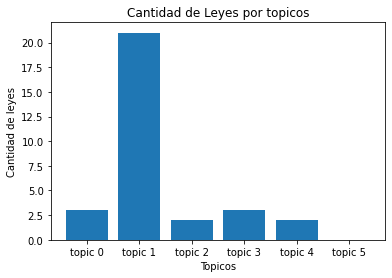

In [64]:

 
## Declaramos valores para el eje x
eje_x = ['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5']
 
## Declaramos valores para el eje y
eje_y = cantidad
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Cantidad de leyes')
 
## Legenda en el eje x
plt.xlabel('Topicos')
 
## Título de Gráfica
plt.title('Cantidad de Leyes por topicos')
 
## Mostramos Gráfica
plt.show()